In [1]:
using IFSintegrals, Plots;

Create IFS, as an array of similarities:

In [14]:
ρ = 0.37
IFS = [
    Similarity(ρ,[0,0])
    Similarity(ρ,[0.2,0])
    Similarity(ρ,[0.2,0])
    Similarity(ρ,[-0.2,-0.3])
]
Γ = Attractor(IFS);

In [20]:
Γ = Sierpinski()

Attractor{StaticArrays.SVector{2, Float64}, StaticArrays.SMatrix{2, 2, Float64, 4}}(Similarity{StaticArrays.SVector{2, Float64}, StaticArrays.SMatrix{2, 2, Float64, 4}}[Similarity{StaticArrays.SVector{2, Float64}, StaticArrays.SMatrix{2, 2, Float64, 4}}(0.5, [0.0, 0.16666666666666666], [1.0 0.0; 0.0 1.0], [0.5 0.0; 0.0 0.5]), Similarity{StaticArrays.SVector{2, Float64}, StaticArrays.SMatrix{2, 2, Float64, 4}}(0.5, [0.23570226039551584, -0.23570226039551584], [1.0 0.0; 0.0 1.0], [0.5 0.0; 0.0 0.5]), Similarity{StaticArrays.SVector{2, Float64}, StaticArrays.SMatrix{2, 2, Float64, 4}}(0.5, [-0.23570226039551584, -0.23570226039551584], [1.0 0.0; 0.0 1.0], [0.5 0.0; 0.0 0.5])], 2, 1.5849625007211563, true, true, [0.0, -0.20315856941624336], 1.0, 1.0, [0.3333333333333333, 0.3333333333333333, 0.3333333333333333])

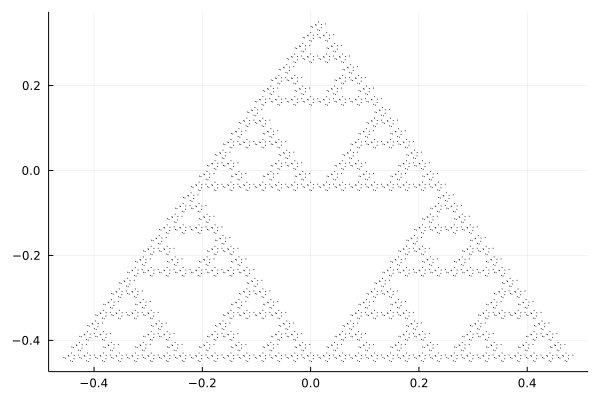

In [21]:
draw(Γ)

The exterior Helmholtz PDE is
$$(\Delta+k^2) u = 0 \quad\text{ in } \quad\mathbb{R}^2\setminus\Gamma,\qquad u=0\text{ on } \Gamma$$.

This can be reformulated as a boundary integral equation: 
$$S\phi = f \quad\text{on } \Gamma,$$ with wavenumber $k$, incident direction $d$, where $S$ is an integral operator.

In [22]:
k = 52.0
d = [0, 0, -1]
S = SingleLayer(Γ, k)
f(x) = exp(im*k*(d[1:2]'*x))

f (generic function with 1 method)

Now approximately solve the boundary integral equation, via Galekrin method: Find $\phi_h\in V_h(\Gamma)$ which satisfies
$$\left<S\phi_h,\varphi\right>_\Gamma = \left<f,\varphi\right>_\Gamma,\quad\varphi\in V_h(\Gamma)$$

In [23]:
Sh = DiscreteBIO(S,h_BEM = 0.05, h_quad = 0.01)
ϕ = Sh\f;

Now plot the solution in some slice of the domain, using the representation formula
$$
u(x) = u^i(x) - \int_\Gamma \Phi(x,y)\phi(y)\mathcal{H}^d(y) \approx u^i(x) - \int_\Gamma \Phi(x,y)\phi_h(y)\mathcal{H}^d(y),\quad x \in\mathbb{R}^2\setminus\Gamma
$$

In [26]:
XY0,x,y = slice([-0.5,-0.5],[0.5,0.5],-0.2,100,100)
Sₖϕ = single_layer_potential(k,ϕ)# returns function
uⁱ(x) = exp(im*k*(d'*x)) # define inc field in domain
uᵗ(x) = uⁱ(x) - Sₖϕ(x)

uᵗ (generic function with 1 method)

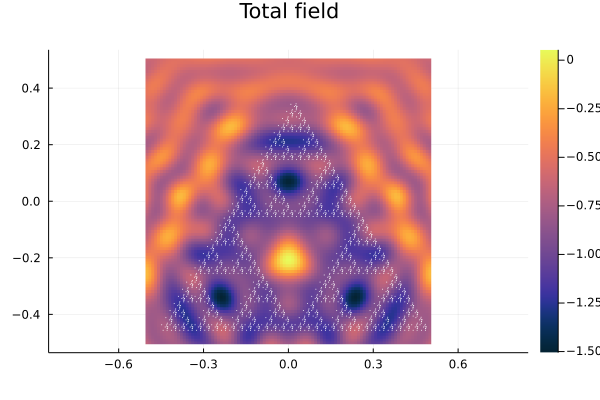

In [27]:
heatmap(x,y,real(uᵗ.(XY0)), aspect_ratio = 1, 
    title="Total field", legend=true, c = :thermal)
IFSintegrals.draw!(Γ,color = "white")